In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import anndata
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
adata = sc.read_h5ad('data/aa_aligned_adata_sc.h5ad')

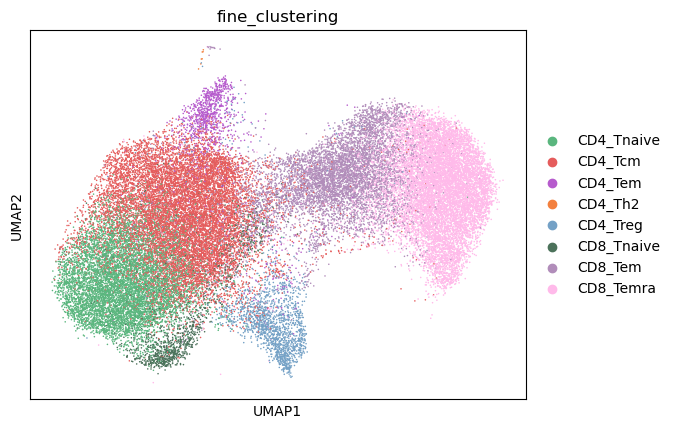

In [3]:
sc.pl.umap(adata, size=5, color='fine_clustering')

In [4]:
from collections import defaultdict
tdata = defaultdict(dict)

In [5]:
tdata['Treg'] = adata[adata.obs['fine_clustering'].isin(['CD4_Treg'])].copy()
tdata['CD4'] = adata[adata.obs['fine_clustering'].isin(['CD4_Tcm', 'CD4_Tnaive', 'CD4_Treg', 'CD4_Tem', 'CD4_Th2'])].copy()
tdata['CD4_nonTreg'] = adata[adata.obs['fine_clustering'].isin(['CD4_Tcm', 'CD4_Tnaive', 'CD4_Tem', 'CD4_Th2'])].copy()
tdata['CD8'] = adata[adata.obs['fine_clustering'].isin(['CD8_Temra', 'CD8_Tem', 'CD8_Tnaive'])].copy()


-----------------------------------------
# Clonotype Size - CD4 compartment only:

In [6]:
adata.obs['exp_size'] = 0

In [7]:
#Unique clono ids:
clone_ids = adata.obs['cc_aa_alignment'].unique()

In [8]:
for i in clone_ids:
    adata.obs.loc[(adata.obs['cc_aa_alignment']==i), 'exp_size'] = len(adata.obs[(adata.obs['cc_aa_alignment']==i) & (adata.obs['fine_clustering'].isin(['CD4_Tcm','CD4_Tnaive','CD4_Treg','CD4_Tem','CD4_Th2']))])

In [9]:
cd4s = adata[adata.obs['fine_clustering'].isin(['CD4_Tcm','CD4_Tnaive','CD4_Treg','CD4_Tem','CD4_Th2'])].copy()

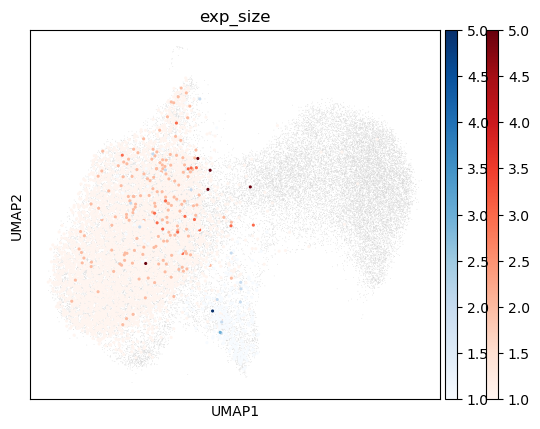

In [10]:
#Saline:
ax = sc.pl.umap(adata, show = False, size = 1)
ax2 = sc.pl.umap(cd4s[(~cd4s.obs['fine_clustering'].isin(['CD4_Treg'])&(cd4s.obs['treatment']=='Saline'))],
           color = 'exp_size',
           color_map = 'Reds', 
           ax = ax, 
           size = 20,
           show = False, 
           vmax = 5)
ax3 = sc.pl.umap(cd4s[(cd4s.obs['fine_clustering'].isin(['CD4_Treg']))&(cd4s.obs['treatment']=='Saline')],
           color = 'exp_size',
           color_map = 'Blues', 
           ax = ax2, 
           size = 20,
           vmax = 5,)

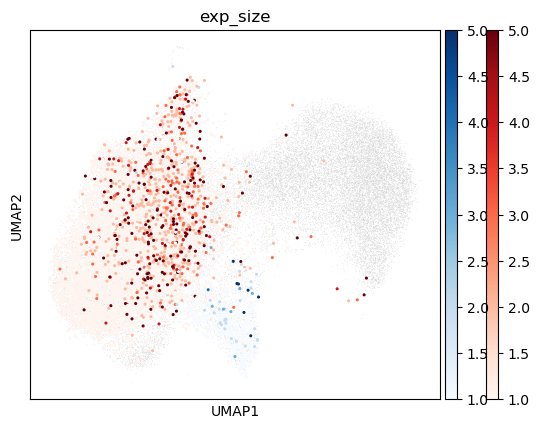

In [11]:
#IL2 - 1.5MIU:
ax = sc.pl.umap(adata, show = False, size = 1)
ax2 = sc.pl.umap(cd4s[(~cd4s.obs['fine_clustering'].isin(['CD4_Treg'])&(cd4s.obs['treatment']=='1.5MIU'))],
           color = 'exp_size',
           color_map = 'Reds', 
           ax = ax, 
           size = 20,
           show = False, 
           vmax = 5)
ax3 = sc.pl.umap(cd4s[(cd4s.obs['fine_clustering'].isin(['CD4_Treg']))&(cd4s.obs['treatment']=='1.5MIU')],
           color = 'exp_size',
           color_map = 'Blues', 
           ax = ax2, 
           size = 20,
           vmax = 5,)

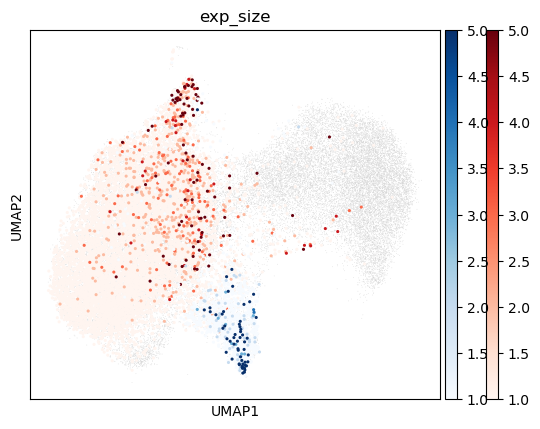

In [12]:
#IL2 - 2.5MIU:
ax = sc.pl.umap(adata, show = False, size = 1)
ax2 = sc.pl.umap(cd4s[(~cd4s.obs['fine_clustering'].isin(['CD4_Treg'])&(cd4s.obs['treatment']=='2.5MIU'))],
           color = 'exp_size',
           color_map = 'Reds', 
           ax = ax, 
           size = 20,
           show = False, 
           vmax = 5)
ax3 = sc.pl.umap(cd4s[(cd4s.obs['fine_clustering'].isin(['CD4_Treg']))&(cd4s.obs['treatment']=='2.5MIU')],
           color = 'exp_size',
           color_map = 'Blues', 
           ax = ax2, 
           size = 20,
           vmax = 5,)